<a href="https://colab.research.google.com/github/mamud1977/bootup/blob/main/NN_Recurrent_Stock%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [80]:
data = pd.read_csv('/content/sample_data/GOOG.csv')

data.head(4)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
3,2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700


In [81]:
data.max(), data.min()

(Date          2019-10-04
 Open              1274.0
 High          1289.27002
 Low          1266.295044
 Close        1287.579956
 Adj Close    1287.579956
 Volume          82541500
 dtype: object,
 Date         2004-08-19
 Open          49.409801
 High          50.680038
 Low           47.800831
 Close         49.818268
 Adj Close     49.818268
 Volume             7900
 dtype: object)

In [82]:
data[data['Date']> '2015-01-01']

,Date,Open,High,Low,Close,Adj Close,Volume
2611,2015-01-02,527.561584,529.815369,522.665039,523.373108,523.373108,1447500
2612,2015-01-05,521.827332,522.894409,511.655243,512.463013,512.463013,2059800
2613,2015-01-06,513.589966,514.761719,499.678131,500.585632,500.585632,2899900
2614,2015-01-07,505.611847,505.855164,498.281952,499.727997,499.727997,2065000
2615,2015-01-08,496.626526,502.101471,489.655640,501.303680,501.303680,3353500
...,...,...,...,...,...,...,...
3804,2019-09-30,1220.969971,1226.000000,1212.300049,1219.000000,1219.000000,1404100
3805,2019-10-01,1219.000000,1231.229980,1203.579956,1205.099976,1205.099976,1273500
3806,2019-10-02,1196.979980,1196.979980,1171.290039,1176.630005,1176.630005,1615100
3807,2019-10-03,1180.000000,1189.060059,1162.430054,1187.829956,1187.829956,1621200


In [83]:
train_data= data[data['Date'] < '2015-01-01']
test_data = data[data['Date'] >= '2015-01-01']

train_data.shape   ## (2611,7)


(2611, 7)

In [84]:
test_data.shape  ## (1198,7)

(1198, 7)

In [85]:
train_data.head(4)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
3,2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700


In [86]:
train_data.drop(['Date','Adj Close'], axis=1, inplace=True)

<ipython-input-86-a83f4273c27b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop(['Date','Adj Close'], axis=1, inplace=True)


In [87]:
train_data.head(4)

,Open,High,Low,Close,Volume
0,49.813286,51.835709,47.800831,49.982655,44871300
1,50.316402,54.336334,50.062355,53.952770,22942800
2,55.168217,56.528118,54.321388,54.495735,18342800
3,55.412300,55.591629,51.591621,52.239193,15319700


In [88]:
scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_data)
train_data[2:3]


array([[0.01025177, 0.01041574, 0.01166001, 0.00838273, 0.22215074]])

In [89]:
scaler.scale_

array([1.78031093e-03, 1.78105343e-03, 1.78819257e-03, 1.79215165e-03,
       1.21162775e-08])

In [11]:
train_data.shape[1]

5

In [12]:
X_train = []
Y_train = []

for i in range(60, train_data.shape[0]):
  X_train.append(train_data[i-60:i])
  Y_train.append(train_data[i,0])

In [23]:
X_train[0].shape

(60, 5)

In [25]:
Y_train[0:1]

[0.07630296751038479]

In [120]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.LSTM(units=60, activation='relu',  return_sequences=True, input_shape=(60,5)))

model.add(tf.keras.layers.LSTM(units=80, activation='relu', return_sequences=True))

model.add(tf.keras.layers.LSTM(units=100, activation='relu', return_sequences=True))

model.add(tf.keras.layers.LSTM(units=100, activation='relu'))

model.add(tf.keras.layers.Dense(units=1))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [121]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 60, 60)              │          15,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 60, 80)              │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 60, 100)             │          72,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 213,861 (835.39 KB)

 Trainable params: 213,861 (835.39 KB)

 Non-trainable params: 0 (0.00 B)

In [122]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [123]:
model.fit(np.array(X_train), np.array(Y_train), epochs=4)

Epoch 1/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 20s 171ms/step - loss: 0.0604
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 14s 170ms/step - loss: 0.0012
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 20s 168ms/step - loss: 0.0010
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 21s 179ms/step - loss: 9.9944e-04
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 14s 170ms/step - loss: 8.9250e-04
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 14s 169ms/step - loss: 7.5717e-04
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 20s 168ms/step - loss: 0.0010
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 20s 167ms/step - loss: 6.2858e-04
Epoch 9/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 14s 170ms/step - loss: 7.1332e-04
Epoch 10/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 22s 192ms/step - loss: 6.6757e-04


In [124]:
train_data

array([[7.18328756e-04, 2.05831180e-03, 0.00000000e+00, 2.94606433e-04,
        5.43577404e-01],
       [1.61403167e-03, 6.51205852e-03, 4.04404041e-03, 7.40965457e-03,
        2.77885613e-01],
       [1.02517709e-02, 1.04157429e-02, 1.16600116e-02, 8.38273019e-03,
        2.22150736e-01],
       ...,
       [8.56904684e-01, 8.60843352e-01, 8.59689640e-01, 8.58547671e-01,
        2.75112197e-02],
       [8.49625446e-01, 8.53152558e-01, 8.54551971e-01, 8.58708465e-01,
        1.05205637e-02],
       [8.55235859e-01, 8.55727933e-01, 8.52180193e-01, 8.51523779e-01,
        1.64817723e-02]])

Model Testing

In [126]:
test_data

array([[0.04389105, 0.04429279, 0.04671372, 0.04039749, 0.08651306],
       [0.03654607, 0.03558337, 0.03259987, 0.02669785, 0.1440725 ],
       [0.02599488, 0.02534909, 0.01724597, 0.01178361, 0.22304634],
       ...,
       [0.90134547, 0.88386106, 0.87820964, 0.86068189, 0.10226835],
       [0.87959591, 0.87389454, 0.8668517 , 0.87474549, 0.10284178],
       [0.89482576, 0.90205766, 0.90113066, 0.90132839, 0.04642846]])

In [127]:
test_data.drop(['Date','Adj Close'], axis=1, inplace=True)

AttributeError: 'numpy.ndarray' object has no attribute 'drop'

In [128]:
test_data

array([[0.04389105, 0.04429279, 0.04671372, 0.04039749, 0.08651306],
       [0.03654607, 0.03558337, 0.03259987, 0.02669785, 0.1440725 ],
       [0.02599488, 0.02534909, 0.01724597, 0.01178361, 0.22304634],
       ...,
       [0.90134547, 0.88386106, 0.87820964, 0.86068189, 0.10226835],
       [0.87959591, 0.87389454, 0.8668517 , 0.87474549, 0.10284178],
       [0.89482576, 0.90205766, 0.90113066, 0.90132839, 0.04642846]])

In [129]:
scaler2 = MinMaxScaler()
test_data = scaler2.fit_transform(test_data)
test_data.shape

(1198, 5)

In [130]:
past_60_days = train_data[-60:]
past_60_days.shape

(60, 5)

In [131]:
test_df = np.append(past_60_days, test_data, axis=0)

test_df.shape

(1258, 5)

In [132]:
x_test = []
y_test = []

for i in range(60, test_df.shape[0]):
    x_test.append(test_df[i-60:i])
    y_test.append(test_df[i, 0])

In [133]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [134]:
x_test.shape, y_test.shape

((1198, 60, 5), (1198,))

In [135]:
y_pred = model.predict(x_test)

38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step


In [138]:
y_pred.shape

(1198, 1)

In [139]:
scaler2.scale_
scale = 1/scaler2.scale_[0]
scale

1.0

In [140]:
y_pred = y_pred*scale
y_test = y_test*scale

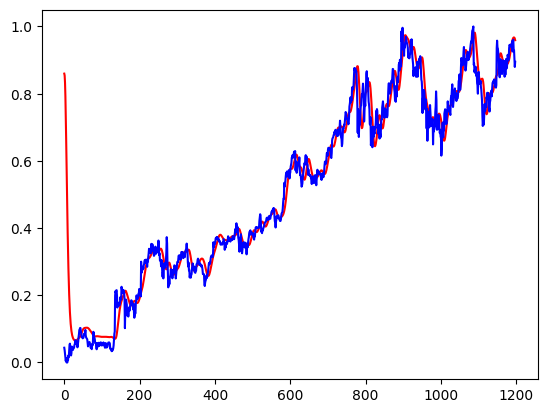

In [141]:
plt.plot(y_pred, color='red')
plt.plot(y_test, color='blue')

Reference: https://github.com/ms723528/Google-Stock-Price-Prediction-Using-RNN---LSTM/blob/master/Google%20Stock%20Price%20Prediction%20Using%20RNN-%20LSTM.ipynb